# Proyek Analisis Data: [Bike Sharing Analysis]
- **Nama:** [Dwi Laras Setyadita]
- **Email:** [larassetyadita@gmail.com]
- **ID Dicoding:** [larassetyadita]

## Menentukan Pertanyaan Bisnis

- Pada hari apakah persewaan sepeda mencapai permintaan tertinggi?
- Bagaimana tren penjualan sepeda di setiap jam pada musim yang berbeda?
- Bagaimana tren penjualan sepeda pada hari dan musim yang berbeda?

Pertanyaan untuk analisis lanjutan
- berdasarkan data waktu, hari, dan musim, kolom mana sajakah yang memiliki korelasi yang tinggi terhadap jumlah sewa sepeda?
- apakah terdapat korelasi antara musim terhadap jumlah penyewaan sepeda yang terjadi?



## Import Semua Packages/Library yang Digunakan

In [24]:
from google.colab import files
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [25]:
uploaded = files.upload()

Saving Bike-sharing-dataset.zip to Bike-sharing-dataset.zip


In [26]:
zip_filename = list(uploaded.keys())[0]
print(zip_filename)

Bike-sharing-dataset.zip


In [27]:
zip_filename = list(uploaded.keys())[0]
print(zip_filename)

Bike-sharing-dataset.zip


In [28]:
local_zip = '/tmp/Bike-sharing-dataset.zip'
os.rename(zip_filename, local_zip)
data = "/tmp/Bike-sharing-dataset"
os.makedirs(data, exist_ok=True)

In [29]:
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(data)
zip_ref.close()

In [30]:
day_df = pd.read_csv('/tmp/Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [31]:
hour_df = pd.read_csv('/tmp/Bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [32]:
# Baca isi file readme
readme_path = "/tmp/Bike-sharing-dataset/Readme.txt"

with open(readme_path, "r") as file:
    print(file.read())


Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

**Insight:**
- Dataset pada Bike-sharing-dataset membagi data menjadi 2 bagian. Bagian pertama adalah data penyewaan sepeda setiap jam, sedang data kedua adalah penyewaan sepeda setiap hari
- Bike-sharing-dataset menyimpan data penyewaan sepeda dengan atribut yang detail

        1. dteday : menyimpan tanggal penyewaan sepeda
        2. season : menyimpan data musim (1:springer, 2:summer, 3:fall, 4:winter)
        3. yr : menyimpan data tahun
        4. mnth : menyimpan data tahun ( 1: januari sampai 12:Desember)
        5. hr : jam (0 sampai 23)
        6. holiday :  menyimpan keterangan hari libur atau tidak
        7. weekday : menyimpan data hari
        8. workingday : menyimpan data hari kerja atau bukan
        9. weathersit : menyimpan data cuaca (1: cerah, sedikit berawan, beraawan, berawan sebagian| 2: berkabut dan berawan, sebagian besar berawan, berkabut dan sedikit berawan, berkabut| 3: bersalju ringan, hujan ringan dan badai petir dan berawan, hujan ringan dan berawan| 4: hujan lebat dan bersalmju dengan badai petir dan kabut)
        10. temp : Suhu yang dinormalisasi dalam Celsius. Nilai dibagi dengan 41 (maksimum).
        11. atemp : Suhu yang dirasakan secara dinormalisasi dalam Celsius. Nilai dibagi dengan 50 (maksimum).
        12. hum : data kelembapan yang dinormalisasi. Nilai dibagi dengan 100 (maksimum).
        13. windspeed : Kecepatan angin yang dinormalisasi. Nilai dibagi dengan 67 (maksimum).
        14. casual : jumlah pengguna tidak terdaftar
        15. registered : jumlah pengguna terdaftar
        16. cnt : jumlah pengguna total

### Assessing Data

#### Menilai data Day

In [33]:
# menilai data day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [34]:
# mencari informasi missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [35]:
# mencari data duplikat
print("Jumlah duplikasi : ", day_df.duplicated().sum())

Jumlah duplikasi :  0


#### Menilai data hour

In [36]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [37]:
# mencari informasi missing value
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [38]:
# mencari data duplikat
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Berdasarkan penilaian terhadap data Day yang telah dilakukan, tidak ditemukan data yang hilang dan duplikasi data.
- Berdasarkan penilaian terhadap data Hour yang telah dilakukan, tidak ditemukan data yang hilang dan duplikasi data.

### Cleaning Data

#### Membersihkan data day

In [39]:
day_df.drop(columns=['instant', 'dteday', 'mnth', 'holiday','workingday','weathersit','temp', 'atemp', 'windspeed','casual','registered','hum'],)


,season,yr,weekday,cnt
0,1,0,6,985
1,1,0,0,801
2,1,0,1,1349
3,1,0,2,1562
4,1,0,3,1600
...,...,...,...,...
726,1,1,4,2114
727,1,1,5,3095
728,1,1,6,1341
729,1,1,0,1796


In [40]:
# mengganti nama kolom
day_df.rename(columns={
    'yr':'year',
    'weekday': 'day',
    'cnt': 'count'
}, inplace=True)

<Axes: >

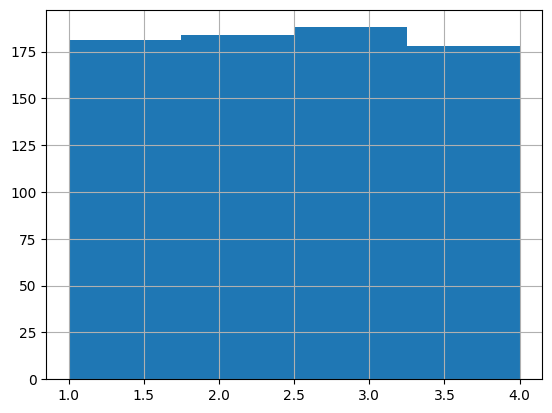

In [41]:
# melihat outlier pada kolom season
day_df['season'].hist(bins=4)

In [42]:
# mengganti nilai pada kolom season
day_df['season']= day_df['season'].replace({1:'springer', 2:'summer', 3:'fall', 4:'winter'})
day_df

,instant,dteday,season,year,mnth,holiday,day,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,springer,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,springer,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,springer,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,springer,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


<Axes: >

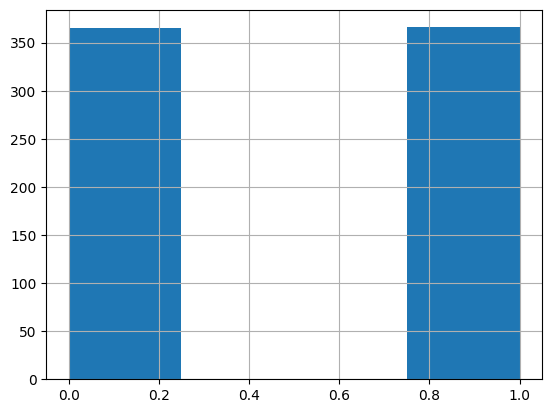

In [43]:
# melihat outlier pada kolom year
day_df['year'].hist(bins=4)

In [44]:
# mengganti nilai pada kolom year
day_df['year'] = day_df['year'].replace({0: '2011', 1: '2012'})
day_df

,instant,dteday,season,year,mnth,holiday,day,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,springer,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,springer,2012,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,springer,2012,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,springer,2012,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,springer,2012,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


<Axes: >

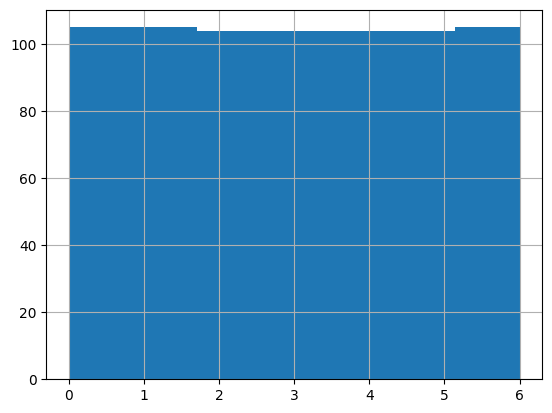

In [45]:
# melihat outlier pada kolom day
day_df['day'].hist(bins=7)

In [46]:
# mengganti nilai pada kolom day
day_df['day'] = day_df['day'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
day_df

,instant,dteday,season,year,mnth,holiday,day,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,springer,2011,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,springer,2012,12,0,Thursday,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,springer,2012,12,0,Friday,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,springer,2012,12,0,Saturday,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,springer,2012,12,0,Sunday,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


<Axes: >

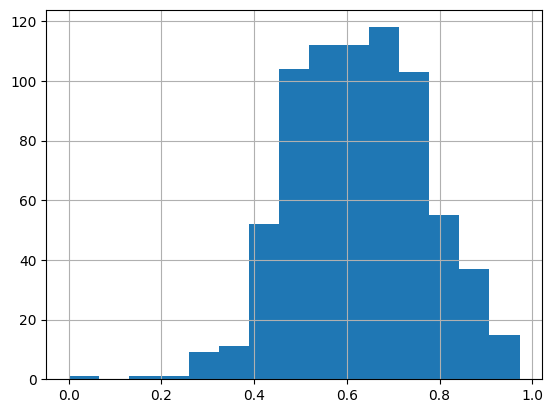

In [47]:
# melihat outlier pada kolom hum
day_df['hum'].hist(bins=15)

<Axes: >

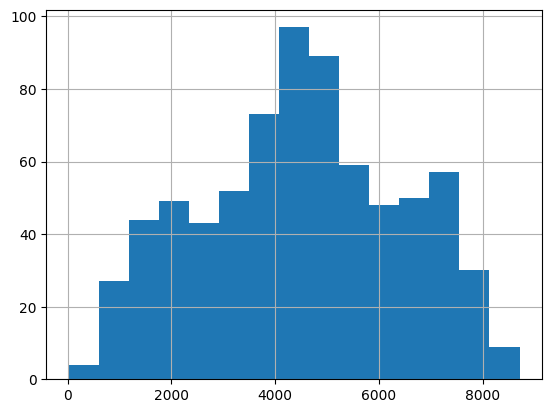

In [48]:
# melihat outlier pada kolom count
day_df['count'].hist(bins=15)

# membersihkan data hour

In [49]:
hour_df.drop(columns=['instant', 'dteday', 'mnth', 'holiday','workingday','weathersit','temp', 'atemp', 'windspeed','casual','registered', 'hum'], inplace=True)
hour_df

,season,yr,hr,weekday,cnt
0,1,0,0,6,16
1,1,0,1,6,40
2,1,0,2,6,32
3,1,0,3,6,13
4,1,0,4,6,1
...,...,...,...,...,...
17374,1,1,19,1,119
17375,1,1,20,1,89
17376,1,1,21,1,90
17377,1,1,22,1,61


In [50]:
# mengganti nama kolom
hour_df.rename(columns={
    'yr':'year',
    'hr' : 'hour',
    'weekday': 'day',
    'cnt': 'count'
}, inplace=True)

<Axes: >

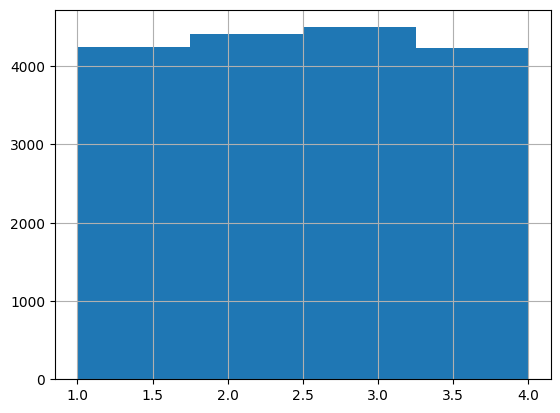

In [51]:
# melihat outlier pada kolom season
hour_df['season'].hist(bins=4)

In [52]:
# mengganti nilai pada kolom season
hour_df['season']= hour_df['season'].replace({1:'springer', 2:'summer', 3:'fall', 4:'winter'})
hour_df

,season,year,hour,day,count
0,springer,0,0,6,16
1,springer,0,1,6,40
2,springer,0,2,6,32
3,springer,0,3,6,13
4,springer,0,4,6,1
...,...,...,...,...,...
17374,springer,1,19,1,119
17375,springer,1,20,1,89
17376,springer,1,21,1,90
17377,springer,1,22,1,61


<Axes: >

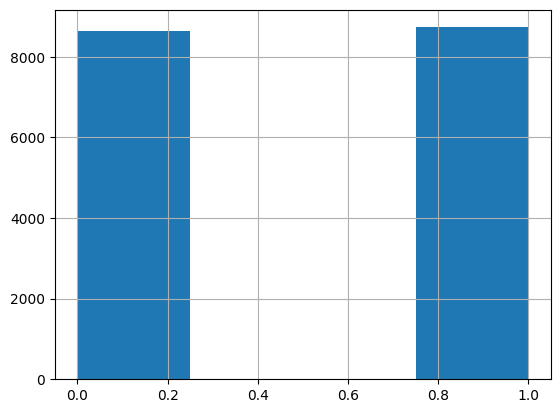

In [53]:
# melihat outlier pada kolom year
hour_df['year'].hist(bins=4)

In [54]:
# mengganti nilai pada kolom year
hour_df['year'] = hour_df['year'].replace({0: '2011', 1: '2012'})
hour_df

,season,year,hour,day,count
0,springer,2011,0,6,16
1,springer,2011,1,6,40
2,springer,2011,2,6,32
3,springer,2011,3,6,13
4,springer,2011,4,6,1
...,...,...,...,...,...
17374,springer,2012,19,1,119
17375,springer,2012,20,1,89
17376,springer,2012,21,1,90
17377,springer,2012,22,1,61


<Axes: >

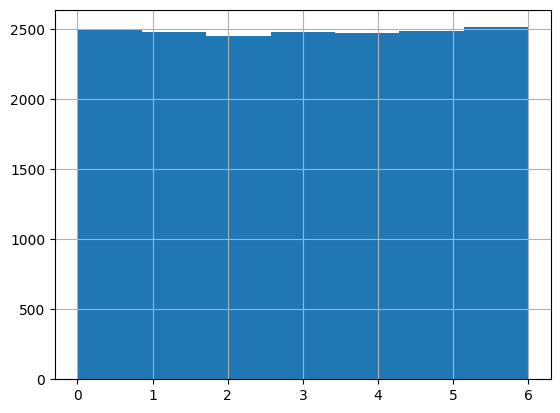

In [55]:
# melihat outlier pada kolom day
hour_df['day'].hist(bins=7)

In [56]:
# mengganti nilai pada kolom day
hour_df['day'] = hour_df['day'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
hour_df

,season,year,hour,day,count
0,springer,2011,0,Saturday,16
1,springer,2011,1,Saturday,40
2,springer,2011,2,Saturday,32
3,springer,2011,3,Saturday,13
4,springer,2011,4,Saturday,1
...,...,...,...,...,...
17374,springer,2012,19,Monday,119
17375,springer,2012,20,Monday,89
17376,springer,2012,21,Monday,90
17377,springer,2012,22,Monday,61


<Axes: >

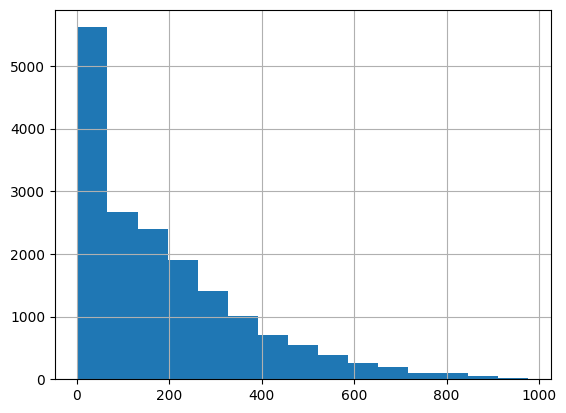

In [58]:
# melihat outlier pada kolom count
hour_df['count'].hist(bins=15)

**Insight:**
- tidak ditemukan outlier pada keseluruhan data
- tahap ini berfokus pada transformasi nilai yang dibutuhkan dalam proses analisis data.

## Exploratory Data Analysis (EDA)

### Explore data day

In [59]:
day_2011_df = day_df[day_df['year'] == '2011']
day_2011_df

,instant,dteday,season,year,mnth,holiday,day,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,springer,2011,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,2011-12-27,springer,2011,12,0,Tuesday,1,2,0.325000,0.327633,0.762500,0.188450,103,1059,1162
361,362,2011-12-28,springer,2011,12,0,Wednesday,1,1,0.299130,0.279974,0.503913,0.293961,255,2047,2302
362,363,2011-12-29,springer,2011,12,0,Thursday,1,1,0.248333,0.263892,0.574167,0.119412,254,2169,2423
363,364,2011-12-30,springer,2011,12,0,Friday,1,1,0.311667,0.318812,0.636667,0.134337,491,2508,2999


In [60]:
day_2012_df = day_df[day_df['year'] == '2012']
day_2012_df

,instant,dteday,season,year,mnth,holiday,day,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
365,366,2012-01-01,springer,2012,1,0,Sunday,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
366,367,2012-01-02,springer,2012,1,1,Monday,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
367,368,2012-01-03,springer,2012,1,0,Tuesday,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
368,369,2012-01-04,springer,2012,1,0,Wednesday,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
369,370,2012-01-05,springer,2012,1,0,Thursday,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,springer,2012,12,0,Thursday,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,springer,2012,12,0,Friday,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,springer,2012,12,0,Saturday,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,springer,2012,12,0,Sunday,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [61]:
# hitung rata-rata penyewaan sepeda setiap hari
avg_rentals_day = day_df.groupby(['year', 'day'])['count'].mean().reset_index()
avg_rentals_day

,year,day,count
0,2011,Friday,3500.115385
1,2011,Monday,3465.788462
2,2011,Saturday,3391.377358
3,2011,Sunday,3405.269231
4,2011,Thursday,3356.769231
5,2011,Tuesday,3468.038462
6,2011,Wednesday,3253.250000
7,2012,Friday,5880.461538
8,2012,Monday,5194.000000
9,2012,Saturday,5732.000000


In [62]:
# Hitung rata-rata penyewaan sepeda berdasarkan hari dan musim 2011
avg_rentals_day_2011 = day_2011_df.groupby(['day', 'season'])['count'].mean().reset_index()
avg_rentals_day_2011

,day,season,count
0,Friday,fall,4521.538462
1,Friday,springer,1988.538462
2,Friday,summer,3720.230769
3,Friday,winter,3770.153846
4,Monday,fall,4466.153846
5,Monday,springer,1500.000000
6,Monday,summer,3767.214286
7,Monday,winter,3955.384615
8,Saturday,fall,4494.615385
9,Saturday,springer,1583.857143


In [64]:
# Hitung rata-rata penyewaan sepeda berdasarkan hari dan musim 2012
avg_rentals_day_2012 = day_2012_df.groupby(['day', 'season'])['count'].mean().reset_index()
avg_rentals_day_2012

,day,season,count
0,Friday,fall,6891.928571
1,Friday,springer,3724.076923
2,Friday,summer,6725.307692
3,Friday,winter,6121.250000
4,Monday,fall,6788.230769
5,Monday,springer,3269.357143
6,Monday,summer,5424.153846
7,Monday,winter,5442.307692
8,Saturday,fall,6597.428571
9,Saturday,springer,3346.076923


### Eksplor data hour

In [65]:
hour_2011_df = hour_df[hour_df['year'] == '2011'].reset_index()
hour_2011_df

,index,season,year,hour,day,count
0,0,springer,2011,0,Saturday,16
1,1,springer,2011,1,Saturday,40
2,2,springer,2011,2,Saturday,32
3,3,springer,2011,3,Saturday,13
4,4,springer,2011,4,Saturday,1
...,...,...,...,...,...,...
8640,8640,springer,2011,19,Saturday,92
8641,8641,springer,2011,20,Saturday,71
8642,8642,springer,2011,21,Saturday,52
8643,8643,springer,2011,22,Saturday,38


In [66]:
hour_2012_df = hour_df[hour_df['year'] == '2012'].reset_index()
hour_2012_df

,index,season,year,hour,day,count
0,8645,springer,2012,0,Sunday,48
1,8646,springer,2012,1,Sunday,93
2,8647,springer,2012,2,Sunday,75
3,8648,springer,2012,3,Sunday,52
4,8649,springer,2012,4,Sunday,8
...,...,...,...,...,...,...
8729,17374,springer,2012,19,Monday,119
8730,17375,springer,2012,20,Monday,89
8731,17376,springer,2012,21,Monday,90
8732,17377,springer,2012,22,Monday,61


In [67]:
# Hitung rata-rata penyewaan sepeda berdasarkan hari dan musim 2011
avg_rentals_hour_2011 = hour_2011_df.groupby(['hour', 'season'])['count'].mean().reset_index()
avg_rentals_hour_2011

,hour,season,count
0,0,fall,61.064516
1,0,springer,18.712644
2,0,summer,45.847826
3,0,winter,45.112360
4,1,fall,36.434783
...,...,...,...
91,22,winter,102.269663
92,23,fall,100.193548
93,23,springer,30.112360
94,23,summer,75.413043


In [68]:
# Hitung rata-rata penyewaan sepeda berdasarkan hari dan musim 2012
avg_rentals_hour_2012 = hour_2012_df.groupby(['hour', 'season'])['count'].mean().reset_index()
avg_rentals_hour_2012

,hour,season,count
0,0,fall,86.627660
1,0,springer,35.714286
2,0,summer,67.836957
3,0,winter,67.681818
4,1,fall,50.851064
...,...,...,...
91,22,winter,145.102273
92,23,fall,145.404255
93,23,springer,58.395604
94,23,summer,116.554348


**Insight:**
- pada tahap ini didapatkan rata-rata persewaan sepeda dari setiap musim, jam, dan hari
- terlihat beberapa data menunjukkan perbedaan yang signifikan terhadap data lainnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada hari apakah persewaan sepeda mencapai permintaan tertinggi?

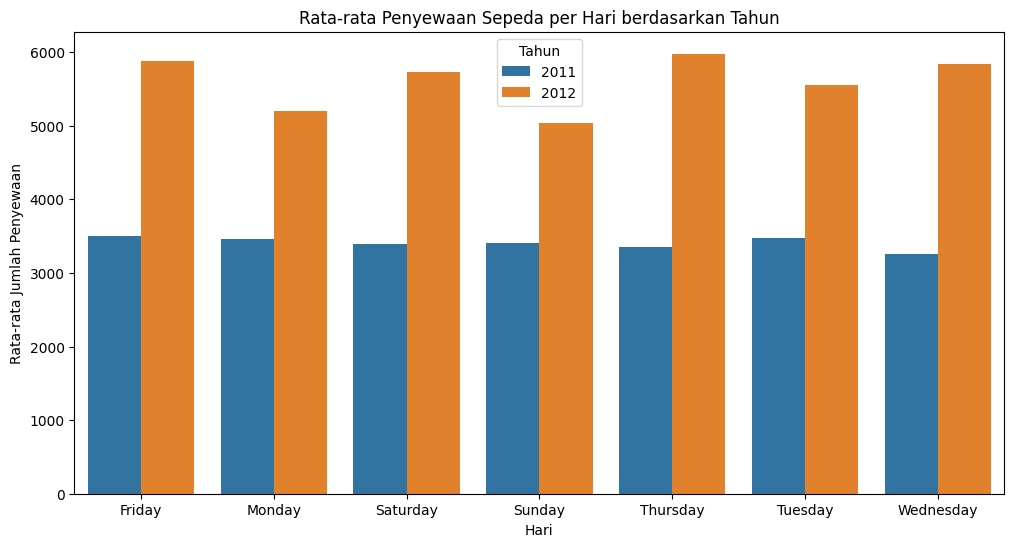

In [69]:
plt.figure(figsize=(12,6))
sns.barplot(data=avg_rentals_day, x='day', y='count', hue='year')

plt.title("Rata-rata Penyewaan Sepeda per Hari berdasarkan Tahun")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.legend(title="Tahun")
plt.show()

### Pertanyaan 2: Bagaimana tren penjualan sepeda di setiap jam pada musim yang berbeda?

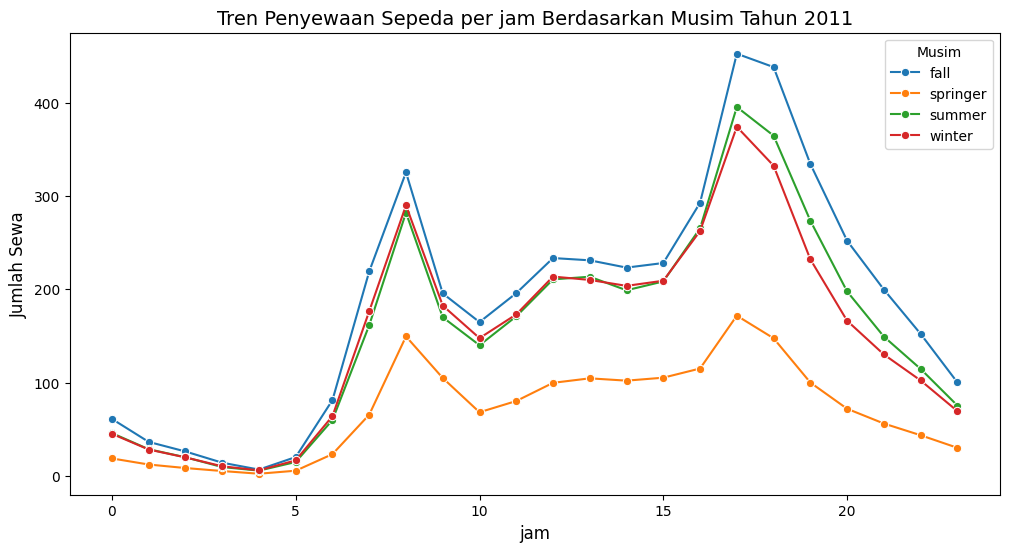

In [70]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_rentals_hour_2011, x='hour', y='count', hue='season', marker='o')

# Menambahkan judul dan label
plt.title("Tren Penyewaan Sepeda per jam Berdasarkan Musim Tahun 2011", fontsize=14)
plt.xlabel("jam", fontsize=12)
plt.ylabel("Jumlah Sewa", fontsize=12)
plt.legend(title="Musim")

# Menampilkan plot
plt.show()

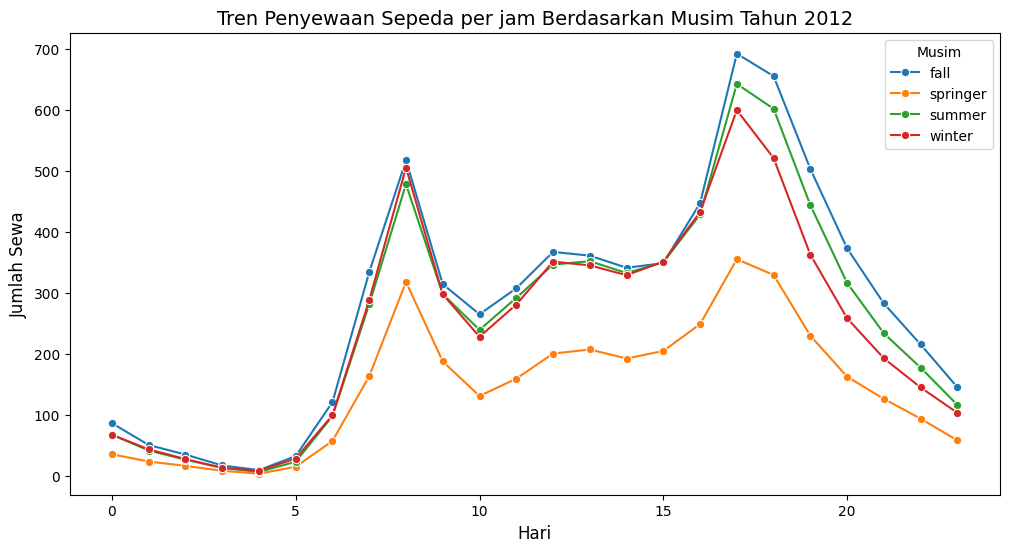

In [71]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_rentals_hour_2012, x='hour', y='count', hue='season', marker='o')

# Menambahkan judul dan label
plt.title("Tren Penyewaan Sepeda per jam Berdasarkan Musim Tahun 2012", fontsize=14)
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Jumlah Sewa", fontsize=12)
plt.legend(title="Musim")

# Menampilkan plot
plt.show()

Pertanyaan 3 : Bagaimana tren penjualan sepeda pada hari dan musim yang berbeda?

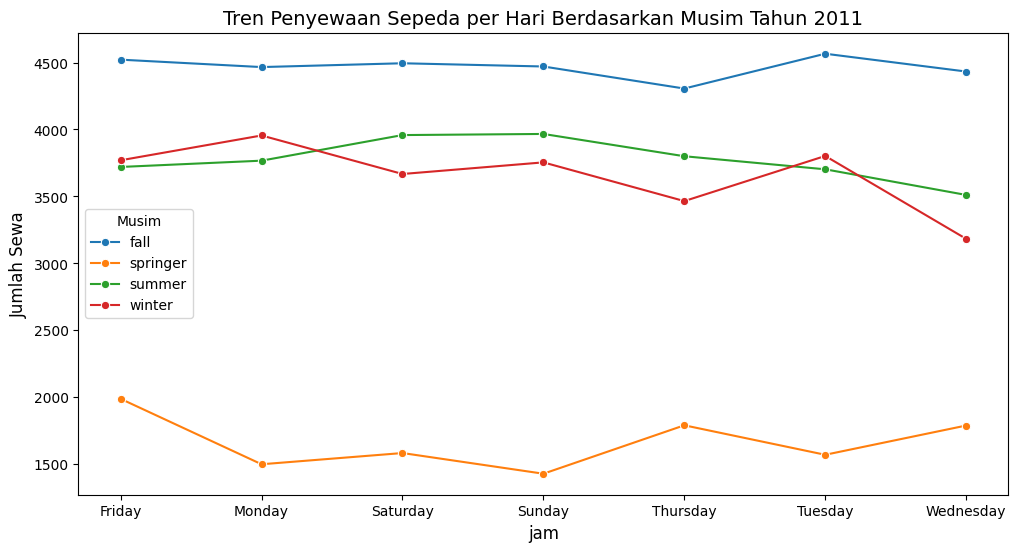

In [72]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_rentals_day_2011, x='day', y='count', hue='season', marker='o')

# Menambahkan judul dan label
plt.title("Tren Penyewaan Sepeda per Hari Berdasarkan Musim Tahun 2011", fontsize=14)
plt.xlabel("jam", fontsize=12)
plt.ylabel("Jumlah Sewa", fontsize=12)
plt.legend(title="Musim")

# Menampilkan plot
plt.show()

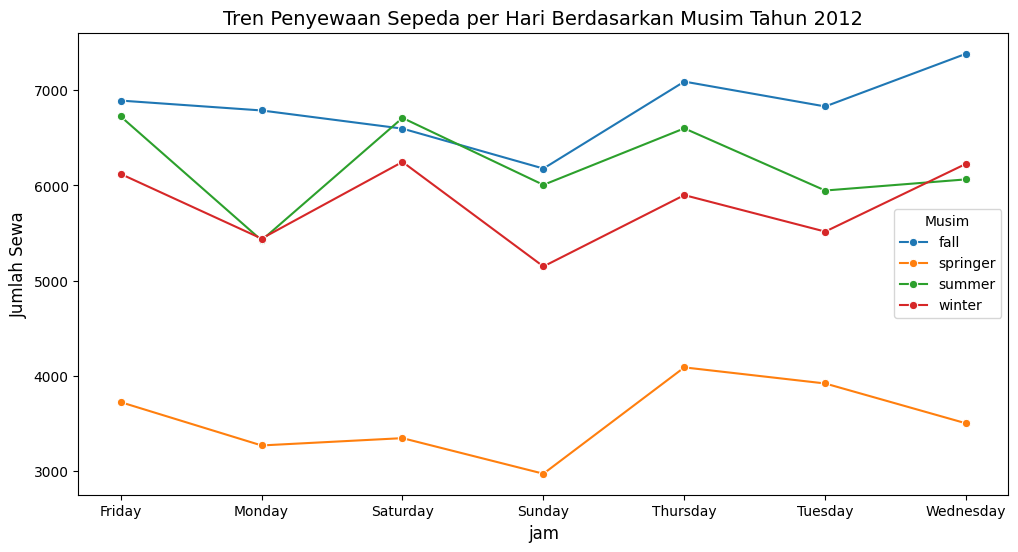

In [73]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_rentals_day_2012, x='day', y='count', hue='season', marker='o')

# Menambahkan judul dan label
plt.title("Tren Penyewaan Sepeda per Hari Berdasarkan Musim Tahun 2012", fontsize=14)
plt.xlabel("jam", fontsize=12)
plt.ylabel("Jumlah Sewa", fontsize=12)
plt.legend(title="Musim")

# Menampilkan plot
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

In [74]:
u_hour_df = pd.read_csv('/tmp/Bike-sharing-dataset/hour.csv')
u_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [75]:
u_hour_df.drop(columns=['instant', 'dteday', 'mnth', 'holiday','workingday','weathersit','temp', 'atemp', 'windspeed','casual','registered','hum'], inplace=True)
u_hour_df


,season,yr,hr,weekday,cnt
0,1,0,0,6,16
1,1,0,1,6,40
2,1,0,2,6,32
3,1,0,3,6,13
4,1,0,4,6,1
...,...,...,...,...,...
17374,1,1,19,1,119
17375,1,1,20,1,89
17376,1,1,21,1,90
17377,1,1,22,1,61


In [76]:
# mengganti nama kolom
u_hour_df.rename(columns={
    'yr':'year',
    'hr' : 'hour',
    'weekday': 'day',
    'cnt': 'count'
}, inplace=True)
u_hour_df

,season,year,hour,day,count
0,1,0,0,6,16
1,1,0,1,6,40
2,1,0,2,6,32
3,1,0,3,6,13
4,1,0,4,6,1
...,...,...,...,...,...
17374,1,1,19,1,119
17375,1,1,20,1,89
17376,1,1,21,1,90
17377,1,1,22,1,61


In [83]:
correlation = u_hour_df[['hour', 'season','day', 'year', 'count']].corr()
print(correlation)

            hour    season       day      year     count
hour    1.000000 -0.006117 -0.003498 -0.003867  0.394071
season -0.006117  1.000000 -0.002335 -0.010742  0.178056
day    -0.003498 -0.002335  1.000000 -0.004485  0.026900
year   -0.003867 -0.010742 -0.004485  1.000000  0.250495
count   0.394071  0.178056  0.026900  0.250495  1.000000


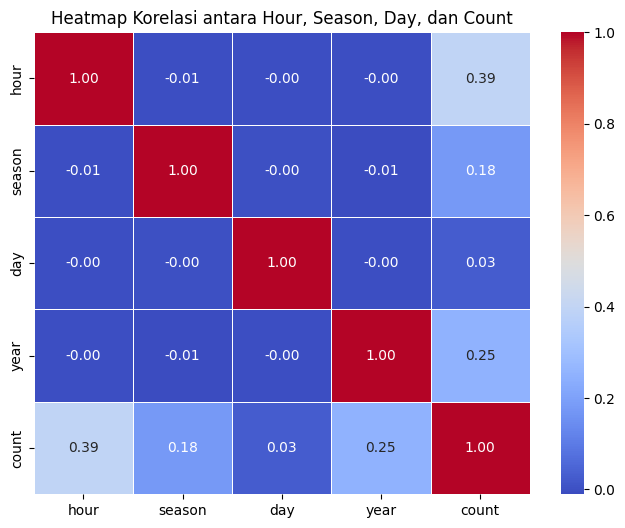

In [84]:
# Membuat heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Menambahkan judul
plt.title("Heatmap Korelasi antara Hour, Season, Day, dan Count", fontsize=12)

# Menampilkan plot
plt.show()

## Conclusion

- Tren jumlah persewaan sepeda tidak menunjukkan perbedaan yang signifikan terhadap perbedaan hari. Namun terdapat perbedaan yang mencolok antara jumlah sepeda yang berhasil disewanan pada tahun 2011 dan 1012
- Terjadi kenaikan jumlah sewa sepeda pada pukul 10 pagi dan pukul 5 sore dengan puncak tertinggi terjadi pada pukul 10 pagi. Tren tersebut menunjukkan hal yang konsisten pada setiap musim.
- Tidak terdapat perbedaan jumlah sewa yang signifikan pada setiap hari, namun perbedaan mencolok terjadi pada rata-rata setiap musim dimana tingkat sewa tertinggi terjadi pada musim gugur dan tingkat sewa terendah terjadi pada musim semi


Jawaban untuk analisis data lanjutan
- berdasarkan heatmap yang telah dibuat, korelasi tertinggi antara kolom hour,dan year, serta menengah pada kolom season. Korelasi yang terjadi antara permintaan sewa sepeda dengan hari terbilang sangat kecil yaitu 0.03 sehingga bisa dikatakan bahwa tidak terdapat korelasi yang terjadi antara hari dan jumlah permintaan sewa sepeda.

In [82]:
avg_rentals_day.to_csv('avg_rentals_day.csv', index=False)
avg_rentals_day_2011.to_csv('avg_rentals_day_2011.csv', index=False)
avg_rentals_day_2012.to_csv('avg_rentals_day_2012.csv', index=False)
avg_rentals_hour_2011.to_csv('avg_rentals_hour_2011.csv', index=False)
avg_rentals_hour_2012.to_csv('avg_rentals_hour_2012.csv', index=False)
u_hour_df.to_csv('u_hour_df.csv', index=False)

files.download('avg_rentals_day.csv')
files.download('avg_rentals_day_2011.csv')
files.download('avg_rentals_day_2012.csv')
files.download('avg_rentals_hour_2011.csv')
files.download('avg_rentals_hour_2012.csv')
files.download('u_hour_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>